- Import SEIRs+ module

In [4]:
from seirsplus.models import *

- Load required libraries

In [50]:
import networkx
%matplotlib inline

- Create graph

In [7]:
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)

- define probabilistic distributions

In [24]:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

- create model

    Params: G       Network adjacency matrix (numpy array) or Networkx graph object.
            beta    Rate of transmission (exposure) 
            sigma   Rate of infection (upon exposure) 
            gamma   Rate of recovery (upon infection) 
            xi      Rate of re-susceptibility (upon recovery)  
            mu_I    Rate of infection-related death  
            mu_0    Rate of baseline death   
            nu      Rate of baseline birth
            p       Probability of interaction outside adjacent nodes
            
            Q       Quarantine adjacency matrix (numpy array) or Networkx graph object.
            beta_D  Rate of transmission (exposure) for individuals with detected infections
            sigma_D Rate of infection (upon exposure) for individuals with detected infections
            gamma_D Rate of recovery (upon infection) for individuals with detected infections
            mu_D    Rate of infection-related death for individuals with detected infections
            theta_E Rate of baseline testing for exposed individuals
            theta_I Rate of baseline testing for infectious individuals
            phi_E   Rate of contact tracing testing for exposed individuals
            phi_I   Rate of contact tracing testing for infectious individuals
            psi_E   Probability of positive test results for exposed individuals
            psi_I   Probability of positive test results for exposed individuals
            q       Probability of quarantined individuals interaction outside adjacent nodes
            
            initE   Init number of exposed individuals       
            initI   Init number of infectious individuals      
            initD_E Init number of detected infectious individuals
            initD_I Init number of detected infectious individuals   
            initR   Init number of recovered individuals     
            initF   Init number of infection-related fatalities
                    (all remaining nodes initialized susceptible)    

In [ ]:
model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0.02, theta_I=0.02, phi_E=0.2, phi_I=0.2, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=10)

- checkpoints: change simulation parameters during the simulation
  (e.g., quarantine)

In [55]:
checkpoints = {'t': [20, 100], 'G': [G_distancing, G_normal], 
               'p': [0.1, 0.5], 'theta_E': [0.02, 0.02], 'theta_I': [0.02, 0.02], 'phi_E':   [0.2, 0.2]}

- Compute the model

In [57]:
time_span = 200 # days
model.run(T=time_span, checkpoints=checkpoints)

t = 160.02
t = 170.00
t = 180.03
t = 190.01
t = 200.05
t = 210.01
t = 220.27
t = 230.02
t = 240.11
t = 250.09
t = 280.24


True

- Make a nice plot

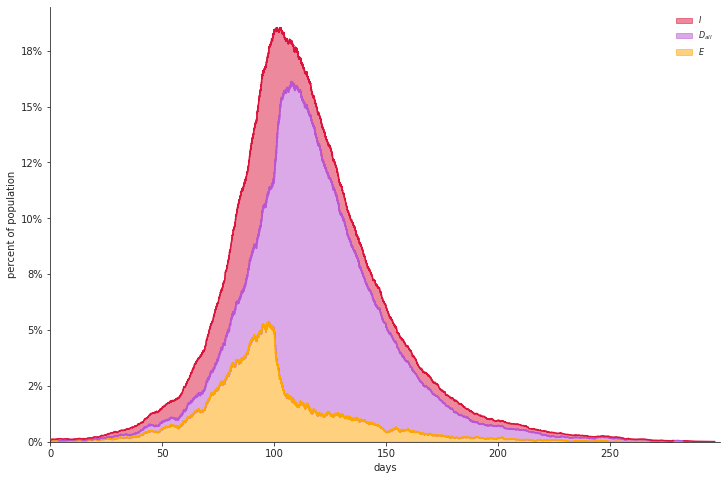

In [58]:
model.figure_infections()